This is an exploration of the results of the CO calibration

In [82]:
import csv
import json
import pandas as pd
import os
from datetime import datetime
from pytz import timezone
import matplotlib.pyplot as plt
import datetime
import urllib
import numpy as np
import plotly.graph_objects as go

In [83]:
# load data from a CSV file
df = pd.read_csv('corrected_co.csv')
print("CO Summary")
print(df["CO_ppb"].describe())
print(" ")
print("Temperature Summary")
print(df["temp"].describe())

#size of the data
print(df.size)

CO Summary
count    72662.000000
mean         0.395809
std          0.532318
min         -4.596291
25%          0.175484
50%          0.219581
75%          0.311549
max         12.189533
Name: CO_ppb, dtype: float64
 
Temperature Summary
count    72662.000000
mean        10.657246
std         14.205853
min       -999.000000
25%          5.024590
50%         10.010989
75%         16.157188
max         29.992558
Name: temp, dtype: float64
726620


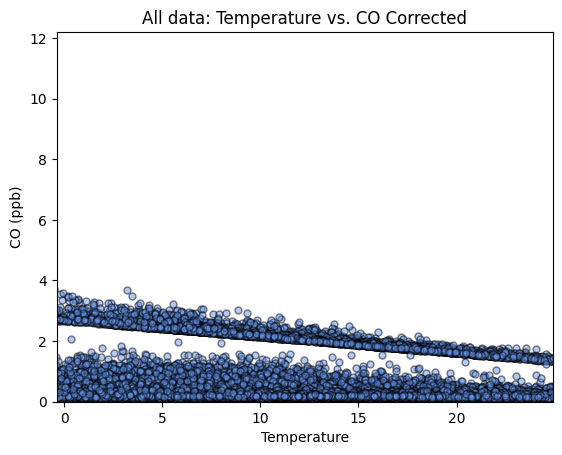

In [84]:

import matplotlib.pyplot as plt




def make_plot(data,title):

    x_min = data['temp'].quantile(0.05) # exclude 5% of lowest values
    x_max = data['temp'].quantile(0.95) # exclude 5% of highest values

    #get the largest value of CO
    y_max = data['CO_ppb'].max()
    y_min = data['CO_ppb'].min()

    # create a scatter plot with adjusted color and size
    plt.scatter(data['temp'], data['CO_ppb'], color='cornflowerblue', s=25,edgecolor='black', alpha=0.5)
    plt.xlim(x_min, x_max)
    plt.ylim(0, y_max) # set y-axis range

    # add labels and title
    plt.xlabel('Temperature')
    plt.ylabel('CO (ppb)')
    plt.title(title + ': Temperature vs. CO Corrected')

    # display the plot
    plt.show()



make_plot(df,'All data')



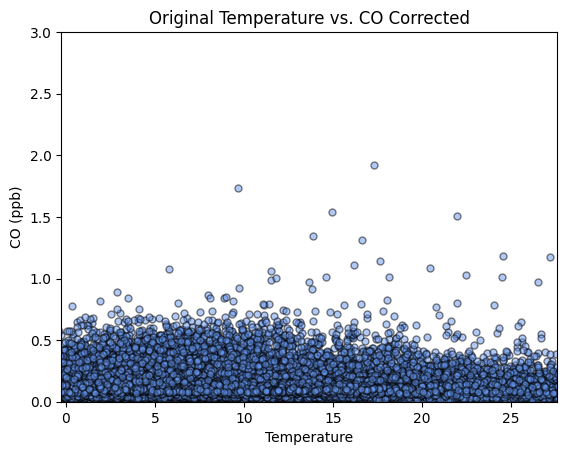

In [89]:
#Comparing to the non corrected data
df2 = pd.read_csv('uncorrected_co.csv')

x_min = df2['temp'].quantile(0.05) # exclude 5% of lowest values
x_max = df2['temp'].quantile(0.95) # exclude 5% of highest values

    #get the largest value of CO
y_max = df2['co_wrk_aux'].max()
y_min = df2['co_wrk_aux'].min()

    # create a scatter plot with adjusted color and size
plt.scatter(df2['temp'], df2['co_wrk_aux'], color='cornflowerblue', s=25,edgecolor='black', alpha=0.5)
plt.xlim(x_min, x_max)
plt.ylim(0, 3) # set y-axis range

    # add labels and title
plt.xlabel('Temperature')
plt.ylabel('CO (ppb)')
plt.title('Original Temperature vs. CO Corrected')

    # display the plot
plt.show()

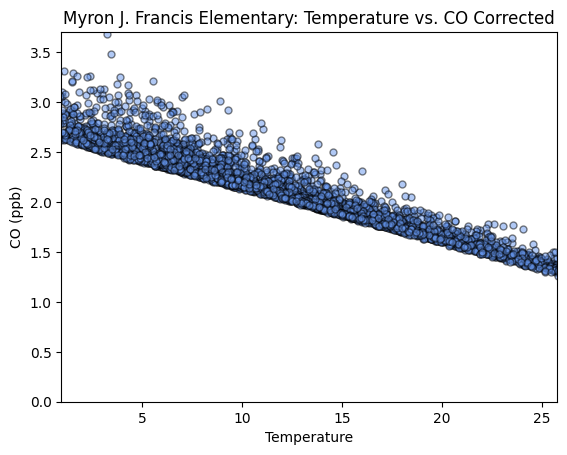

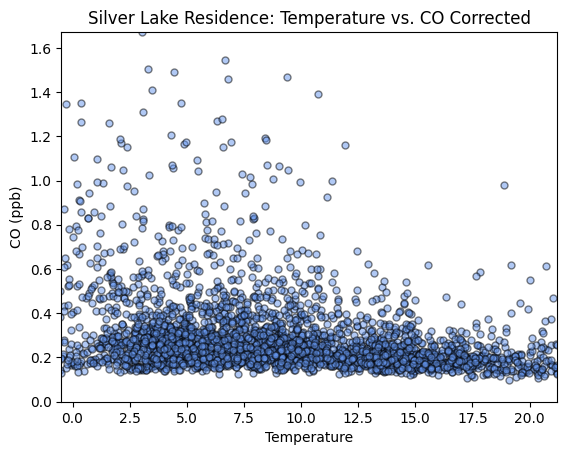

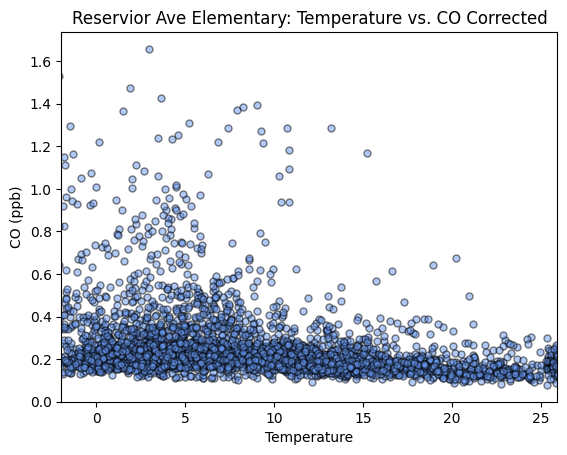

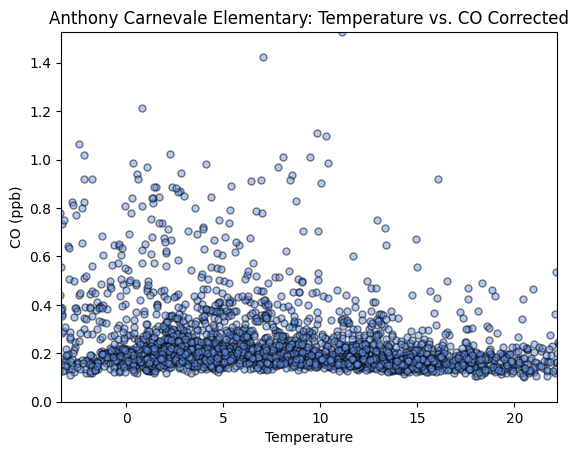

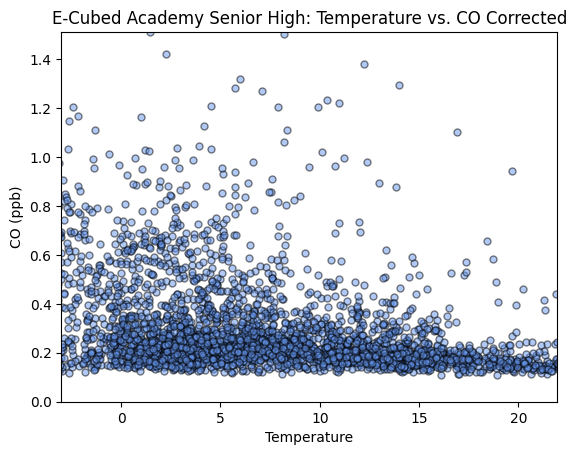

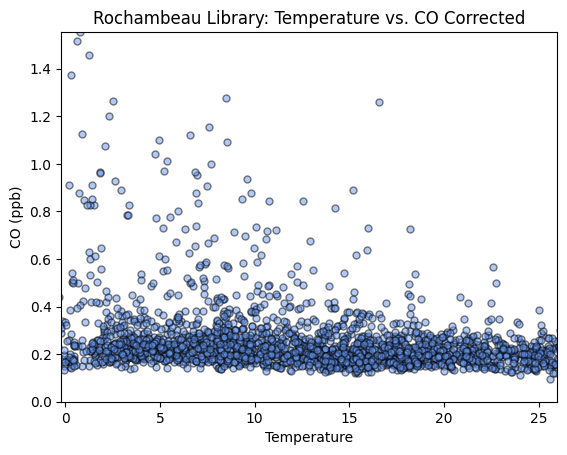

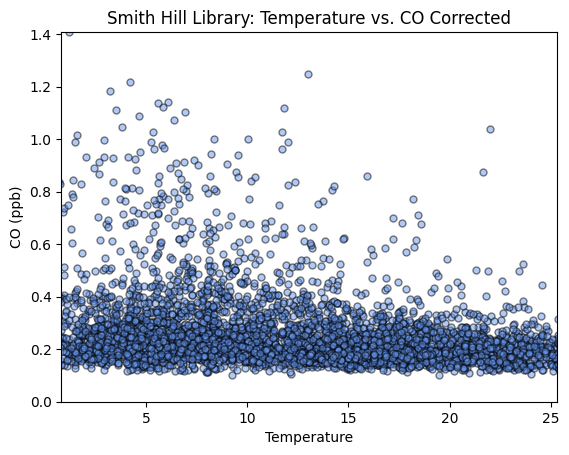

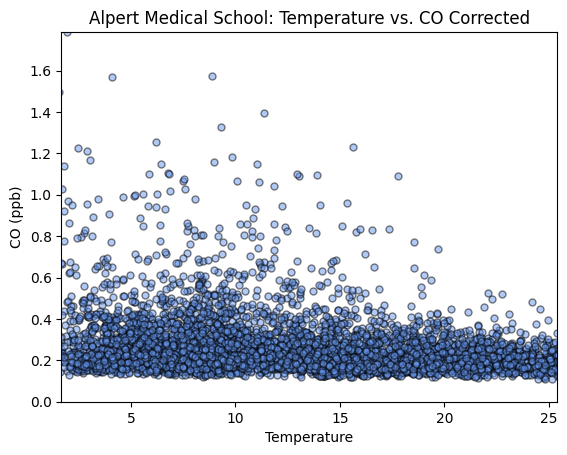

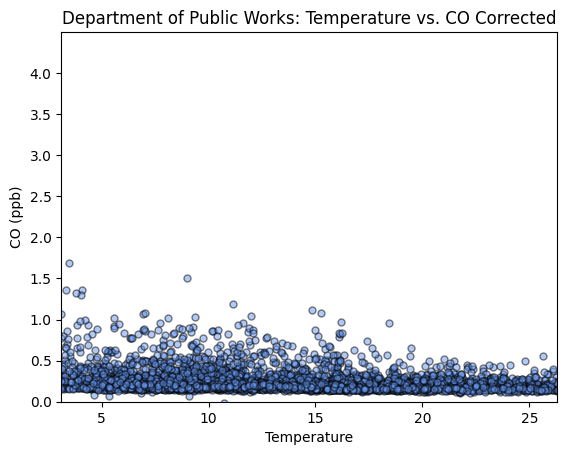

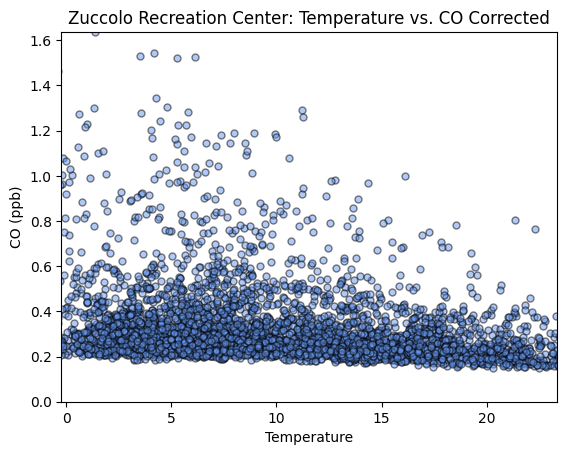

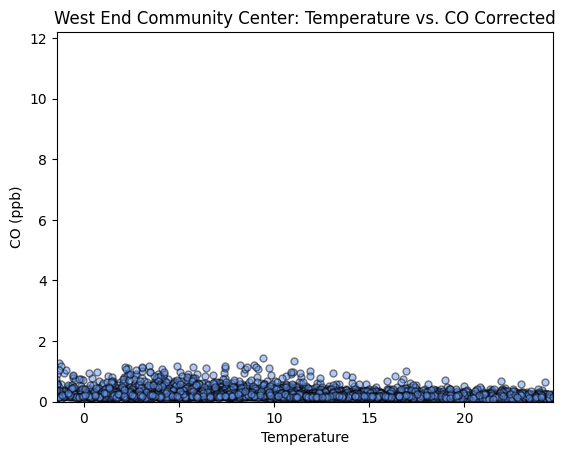

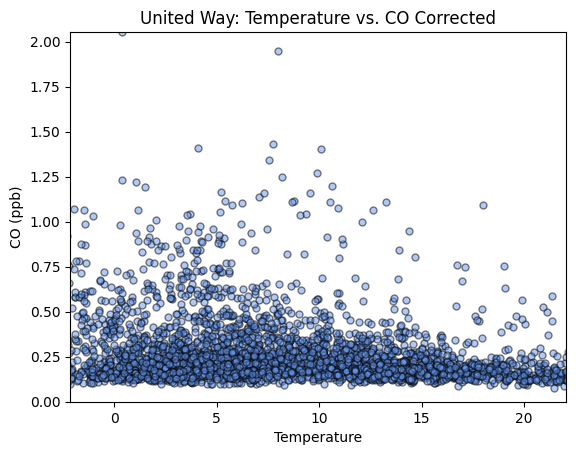

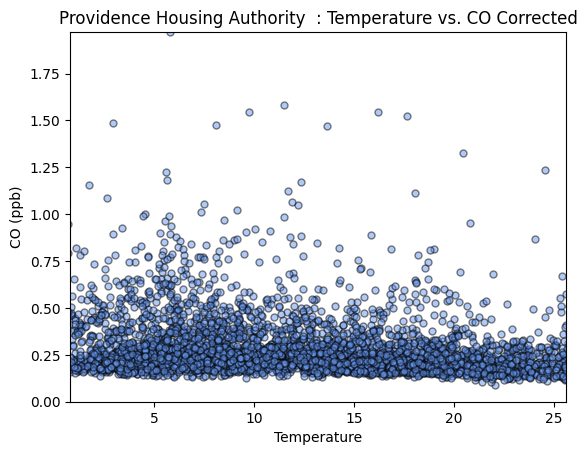

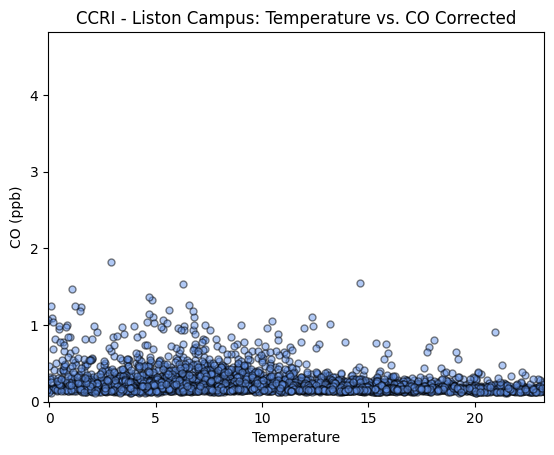

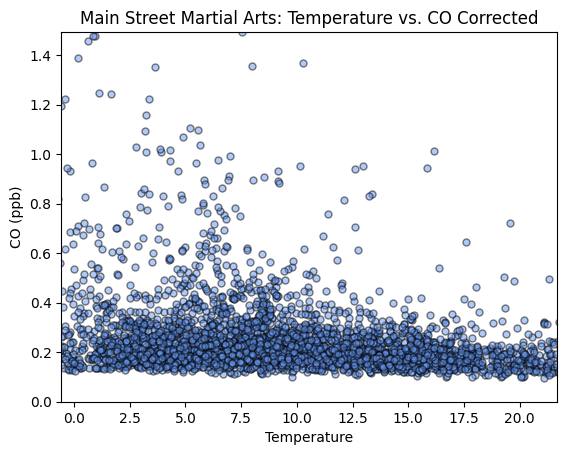

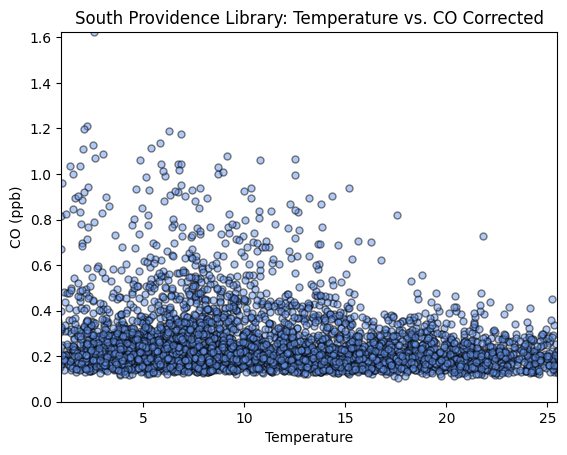

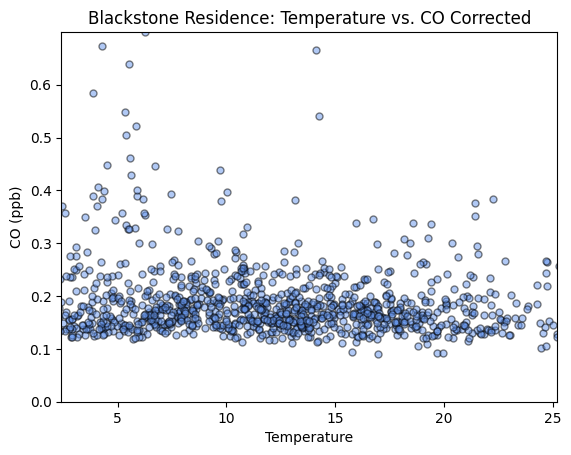

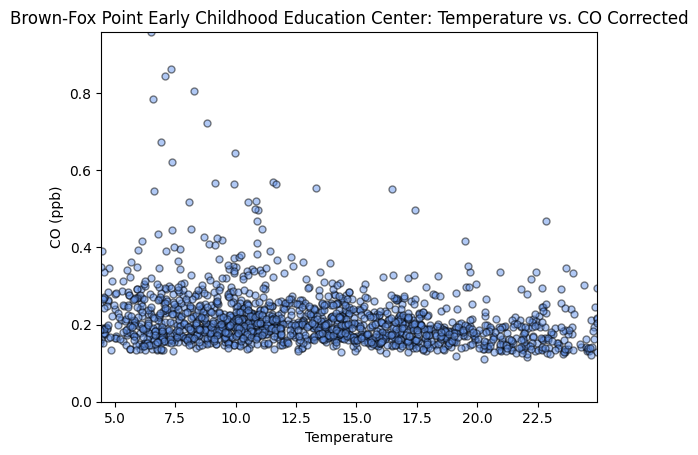

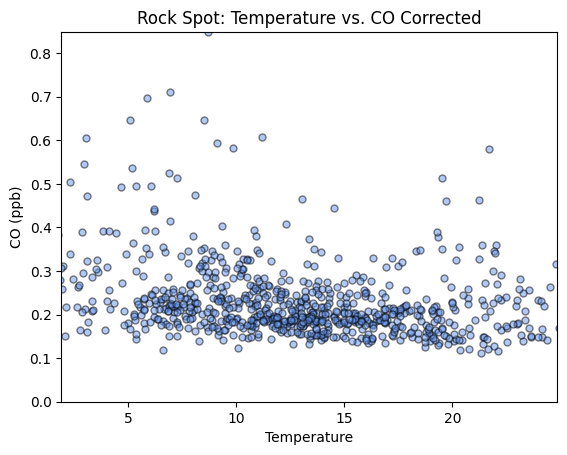

In [86]:
#display the plots for each of the nodes

node_list = pd.read_csv("co_lookup_with_sensors.csv")
node_list = node_list.dropna(subset=['Node ID'])
node_list["Node ID"] = node_list["Node ID"].apply(lambda x: int(str(x)[0:3]))
node_list = list(node_list["Node ID"])

df_nodes = list(df["Node ID"])

for node in node_list:
    # filter df to only include the current node
    node_df = df[df["Node ID"] == node]

    name = str(node_df["Location"].iloc[0])
    make_plot(node_df,name)
    

[0.0, 0.1, 0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 2.5, 3.0]


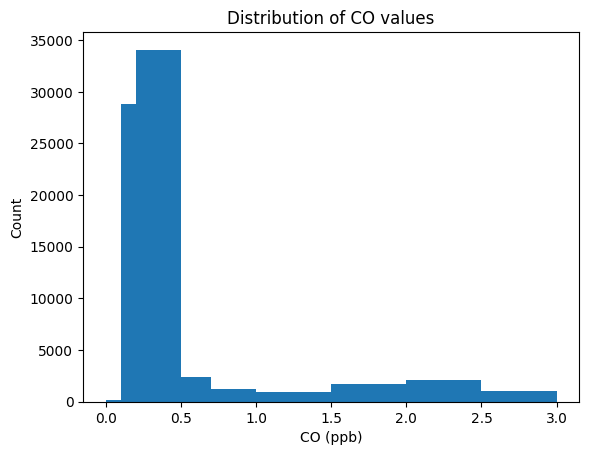

Number of values less than 0.1: 229
Number of values more than 3.0: 136
Mean: 0.3958090683986184
Mean for node 250: 2.118288521085917
Mean for node 254: 0.28267787937535876
Mean for node 258: 0.24897462312517252
Mean for node 261: 0.23564554241365981
Mean for node 264: 0.2824765843945273
Mean for node 267: 0.2457796282965922
Mean for node 270: 0.24904005663239154
Mean for node 274: 0.2613067350386398
Mean for node 276: 0.23336708870216405
Mean for node 251: 0.3153637267382713
Mean for node 252: 0.2522675711310329
Mean for node 255: 0.2602411490488047
Mean for node 257: 0.2733850488521014
Mean for node 259: 0.2412553200123548
Mean for node 262: 0.2476177666668678
Mean for node 263: 0.2515834713105648
Mean for node 266: 0.1878266808442057
Mean for node 269: 0.20887783637639934
Mean for node 268: 0.23113919399453414


In [87]:
# plot the range of values for CO

# create a histogram
bin_edges = [0.0,0.1,0.2,0.5,0.7,1.0,1.5,2.0,2.5,3.0]
print(bin_edges)

# create the histogram using matplotlib
plt.hist(df['CO_ppb'], bins=bin_edges)

# add labels and title
plt.xlabel('CO (ppb)')
plt.ylabel('Count')
plt.title('Distribution of CO values')

# display the plot
plt.show()

# Count the amount of values that are less thatn 0.1
print("Number of values less than 0.1: " + str(len(df[df["CO_ppb"] < 0.1])))
print("Number of values more than 3.0: " + str(len(df[df["CO_ppb"] > 3.0])))
print("Mean: " + str(df['CO_ppb'].mean()))


# Get the mean for each sensor
for node in node_list:
    # filter df to only include the current node
    node_df = df[df["Node ID"] == node]
    print("Mean for node " + str(node) + ": " + str(node_df['CO_ppb'].mean()))


# Count for 




In [88]:
#Plot the CO values versus time 
